#### Setting up the problem
First, lets import our modules.

In [21]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import uniform
from copy import copy
    
sns.set_style('white')
sns.set_context('talk')
import corner
np.random.seed(123)

#### Lets generate some data: 100 points from a Beta distribution with a=1.5 and b=1.5. Our goal will be to estimate the posterior of  a (we'll assume that we know b).

In [9]:
n=100
a,b=1.5 , 1.5
data=beta.rvs(a,b,loc=0,scale=1,size=n)

#print(data)

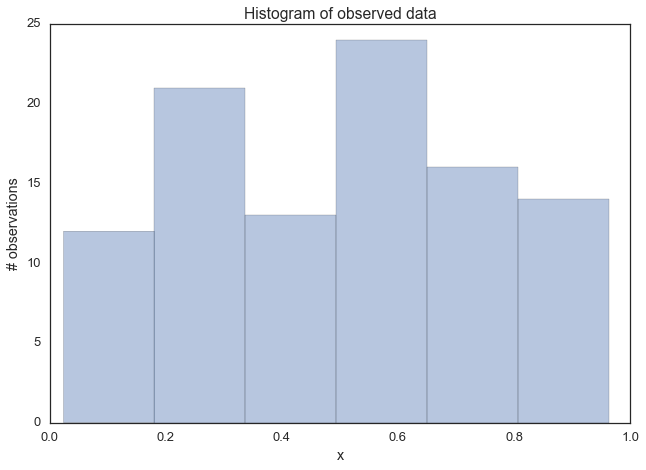

In [8]:
ax = plt.subplot()
sns.distplot(data, kde=False, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations');


#### Next, we have to define our model. 
In this simple case, we will assume that this data is drawn from a Beta distribution, 
i.e.the likelihood of the model follows a Beta distribution. 
A Beta distribution has two parameters -- a and b. 
For simplicity, we'll assume we know that b=1.5 and we'll want to infer the posterior for a. 
For each parameter we want to infer, we have to chose a prior. 
For simplicity, lets also assume a Uniform distribution as a prior for a. Thus, in stats speak our model is:
##### p(a)∼Uniform(0.01,5)
##### p(x|a)∼product of Beta(x_i;a,b=1.5)
The posterior is then the product of prior and likelihood. 


### Explaining MCMC sampling with code
Now on to the sampling logic. At first, you find starting parameter position (can be randomly chosen), lets fix it arbitrarily to:

In [11]:
prior_a_min=0.01
prior_a_max=5.0


In [12]:
a_current = 0.5
posterior = [a_current]
a_proposal_width=0.5

In [14]:
n_samples=1000
for i in range(n_samples):
    a_proposal = norm(a_current, a_proposal_width).rvs()
    prior_current = uniform(prior_a_min, prior_a_max).pdf(a_current)
    likelihood_current = beta(a_current, 1.5).pdf(data).prod()
    post_current = likelihood_current * prior_current
    prior_proposal = uniform(prior_a_min, prior_a_max).pdf(a_proposal)
    likelihood_proposal = beta(a_proposal, 1.5).pdf(data).prod()
    post_proposal = likelihood_proposal * prior_proposal
    prob_accept = post_proposal / post_current
    rand_num=np.random.rand()
    accept = rand_num < prob_accept
    if accept:
        a_current = a_proposal
        posterior.append(a_current)
    
    

In [15]:
print(len(posterior))

334


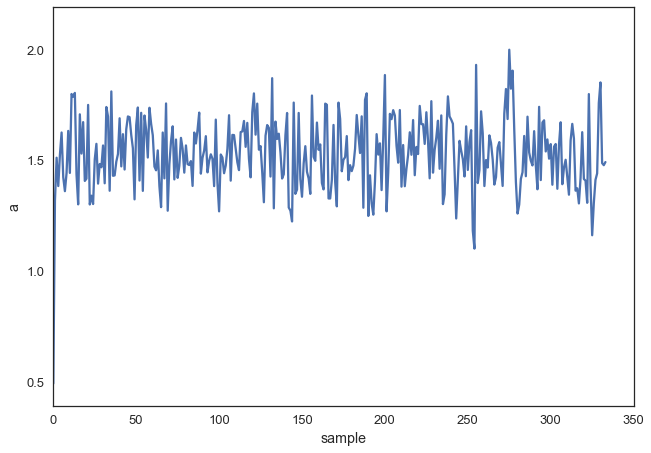

In [17]:
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='sample', ylabel='a');

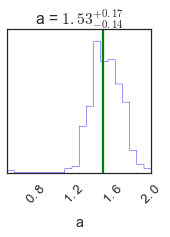

In [24]:
axislabels=['a']
truevals=[1.5]
corner.corner(posterior, labels=axislabels,use_math_text=True,
                    show_titles=True,truths=truevals,
                    title_args={"fontsize": 12},plot_datapoints=False,fill_contours=True, 
                    levels=[0.68, 0.95], color='b',truth_color='g', smooth=1.0);